# Probabilidad

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Introducción

La probabilidad es una medida de la incertidumbre. En algunos casos, las propiedades físicas nos permiten obtener una estimación exacta de la probabilidad de que ocurra un evento, en otros casos no.

*¿Podemos utilizar la probabilidad para medir cualquier incertidumbre?* MI respuesta es sí, la cuestión es qué grado de precisión podemos aportar.

De aquí aparecen distintos enfoques.

**Enfoque clásico**: la probabilidad de que ocurra un evento es el cociente entre el número de casos favorables y el número de casos posibles si todos son igualmente verosímiles. Siempre está entre 0 y 1. Se basa en los datos que tenemos.

                                            P(A) = n(A) / n(S)

        Ejemplo: 
            - Probabilidad de obtener un 4 al lanzar una vez un dado = 1/6
            - Probabilidad de obtener 4, 5 y 1 al lanzar una vez 3 dados = 1/6 * 1/6 * 1/6 = 1/216

In [9]:
def get_a_four(x):
    return(x == 4)

sample_space = [1, 2, 3, 4, 5, 6]
die_sides = len(sample_space)
success_cases = len([x for x in sample_space if get_a_four(x)])
get_a_four_probability = success_cases / die_sides
print(get_a_four_probability)

0.16666666666666666


            
**Enfoque frecuentista**: la probabilidad de que ocurra un evento es el cociente de la frecuencia observada del suceso cuando el experimento see realiza muchas veces. Excluye sucesos que no se pueden reptir y es 100% empírica. Se basa en los datos que tenemos.

                     P(A) = número de veces que ocurre A / número de experimentos o de intentos
                     
        Ejemplo: Lanzar moneda. ¿Cara o cruz?

| Lanzar moneda | 30 veces      | 50 veces     | 100 veces     |
|---------------|---------------|--------------|---------------|
| Cara          | 11            | 19           | 47            |
| Frecuencia    | 11/30 = 0.366 | 19/50 = 0.38 | 47/100 = 0.47 |

**Enfoque bayesiano o subjetivo**: la probabilidad es el grado de creencia o juicio personal. La información que tenemos nos enriquece los cálculos, es decir, no solo se basa el cálculo en los datos que tenemos, también se basa en la información extra que poseemos.


        

## Conceptos clave

- **Fenómeno aleatorio**: en las mismas condiciones iniciales, se producen distintos resultados finales. Como en el lanzamiento de un dado.


- **Evento aleatorio**: conjunto de posibles resultados que puede dar un experimento aleatorio.


- **Espacio muestral (Ω)**: todos los resultados posibles de un experimento. En el lanzamiento de un dado, Ω = {1,2,3,4,5,6}.


- **Independencia**: dos o más eventos son independientes cuando la probabilidad de que ocurra uno de ellos no se ve afectada porque el otro ocurra. Como sacar 1 y 5 lanzando dos dados. De lo contrario, trataríamos con probabilidades condicionales.


- **Ley de los grandes números**:  si se repite un experimento aleatorio, bajo las mismas condiciones, un número ilimitado de veces; y si estas repeticiones son independientes la una de la otra, entonces la frecuencia de veces que un evento A ocurra, convergerá con probabilidad 1 a un número que es igual a la probabilidad de que A ocurra en una sola repetición del experimento. Vamos a ver un ejemplo en código:


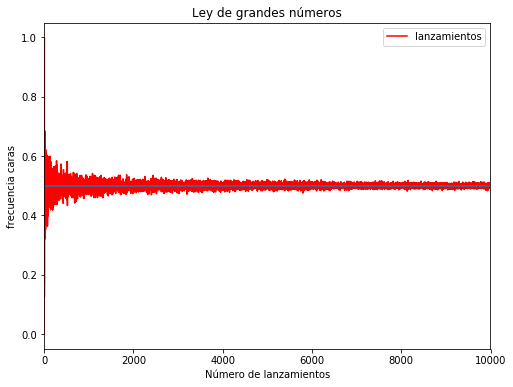

In [10]:
# Ejemplo ley de grandes números
# moneda p=1/2 cara=1 cruz=0
resultados = []
for lanzamientos in range(1,10000):
    lanzamientos = np.random.choice([0,1], lanzamientos) 
    caras = lanzamientos.mean()
    resultados.append(caras)

# gráficamente
df = pd.DataFrame({ 'lanzamientos' : resultados})

df.plot(title='Ley de grandes números',color='r',figsize=(8, 6))
plt.axhline(0.5)
plt.xlabel("Número de lanzamientos")
plt.ylabel("frecuencia caras")
plt.show()

## Cálculo de probabilidades

Antes de ponernos a calcular las probabilidades tenemos que conocer las propiedades básicas de la probabilidad y tenemos que saber identificar las relaciones que pueden guardar varios eventos entre sí.

### Axiomas de la probabilidad
- La probabilidad de que ocurra un evento será un ratio cuyo valor se sitúe entre 0 y 1.

                                        0≤p(A)≤1

- La probabilidad total o la probabilidad de que ocurra un evento con total certeza será igual a 1.
                                        
                                        p(S)=1
                                        
- Si el evento A y el B son mutuamente excluyentes, es decir, si se da uno no puede darse el otro, entonces:
                                        
                                 p(A ∪ B)= p(A) + p(B)

                                        
### Álgebra de conjuntos en la probabilidad

Para entender la relación entre varios eventos y ser capaces de calcular sus probabilidades debemos conocer:

##### Unión : la unión de varios eventos simples crea un evento compuesto que ocurre si uno o más de los eventos ocurren.
                              
                              A o B => A ∪ B => "Ocurre A y/o B"   
                              
                  Ejemplo. Tirar dado. Ocurre A y/o B. No son mutuamente excluyentes
                  
                  - Evento A: Cae impar => Evento A = {1,3,5}
                  - Evento B: Cae mayor que 4 => Evento B = {5,6}
                  
                             Evento A U B = {1,3,5,6}
                             
                          p(A ∪ B) = p(A) + p(B) − p(A ∩ B) 
                          
    - Unión en eventos mutuamente excluyentes:
        - Si sí, p(A U B) = p(A) + p(B)
        - Si no, p(A U B) = p(A) + p(B) - p(A U B)
        
        
                          
##### Intersección: la intersección de dos o más eventos contiene todos los elementos que están en cada uno de esos eventos.

                              A y B => A ∩ B => "Ocurre A y B"   
                              
                  Ejemplo. Tirar dado. Ocurre A y B. Son independientes
                  
                  - Evento A: Cae impar => Evento A = {1,3,5}
                  - Evento B: Cae mayor que 4 => Evento B = {5,6}
                  
                             Evento A ∩ B = {5}
                             
                          p(A ∩ B) = p(A) × p(B) 


    
    - Intersección en eventos independientes:
        - Si sí, p(A ∩ B) = p(A) × p(B) 
        - Si no, p(A ∩ B) = p(A) × p(B|A) (Probabilidad condicional)

#### Ejemplos

1. Ejemplo Eventos mutuamente excluyentes:

Tienes 4 invitaciones para una fiesta y tienes que elegir entre 5 amigas y 6 amigos a ver a quién invitas. Lo eliges al azar. ¿Qué probabilidad hay de que invites a más de 2 mujeres?

In [21]:
#Vamos a necesitar conocer algo de combinatoria simple para resolver este ejercicio
#El espacio muestral que voy a utilizar es la combinatoria de 11 personas de las cuales cogeré 4.

#import math

#sample_space = math.factorial(11) / (math.factorial(4) * math.factorial(11-4))

from scipy.special import comb

sample_space = comb(11,4)
sample_space

330.0

In [44]:
#Los dos escenarios posibles favorables para que invite a más de dos mujeres son:

    #evento A: que invite a 3 mujeres y a un 1 hombre
    #evento B: que invite a 4 mujeres

a = comb(5,3) * comb(6,1)
b = comb(5,4)

prob_a = a / sample_space
prob_b = b / sample_space

print('Existen %d combinaciones en las que ocurre el evento A y %d en las que ocurre el evento B. \
Si calculamos sus probabilidades, obtenemos que la P(A)=%.4f y la P(B)=%.4f' % (a,b, prob_a, prob_b))

Existen 60 combinaciones en las que ocurre el evento A y 5 en las que ocurre el evento B. Si calculamos sus probabilidades, obtenemos que la P(A)=0.1818 y la P(B)=0.0152


In [45]:
#Pero estos eventos son mutuamente excluyentes por lo que busco resolver su unión a través de la ecuación
#P(A U B) = P(A) + P(B)

prob_union = prob_a + prob_b

print('La probabilidad de que invite a más de dos mujeres a la fiesta es de %.4f' % prob_union)

La probabilidad de que invite a más de dos mujeres a la fiesta es de 0.1970


2. Ejemplo eventos independientes:

Tienes 10 cartas en la mano boca abajo. Tres son de picas, 4 de corazones y 3 de diamantes. Pones dos cartas al azar boca arriba y si no son dos diamentes las vuelves a meter en el montón y barajeas. ¿Cuál es la probabilidad de sacar dos diamantes al tercer intento?

In [ ]:
#Evento A: Dos cartas que no son diamantes las dos
#Evento B: Dos cartas que no son diamantes las dos
#Evento C: Dos cartas que son diamantes las dos
#Espacio muestral = 10

prob_A
prob_B
prob_C

prob_inters_ABC

print('La probabilidad de sacar dos diamantes en la tercera tirada es de %.4f' % prob_inters_ABC)

### Probabilidad condicional

*¿Qué pasa cuando los eventos son dependientes?*

Con frecuencia queremos conocer la probabilidad de algún evento, dado que otro evento ha ocurrido. Ejemplo: ¨Las personas que .... tienen más probabilidades de ... ¨.

Esto se conoce como probabilidad condicional, expresa simbólicamente como p(A|B) y se lee como "la probabilidad de A dado que ha ocurrido B". El segundo evento se conoce como la condición y el proceso se refiere a veces como "condicionamiento en B". Calculamos probabilidades basándonos en los datos del espacio muestral + información adicional. 

La probabilidad condicional también se puede usar para comprobar la independencia de dos variables si se cumple que:

                                     p(A|B)=p(A)
                                    
                                    P(B|A) = P(B)
                                  
                                          ó
                                  
                                  P(A)*P(B) = P(A∩B)
      
                    
Para calcular la probabilidad condicional utilizaremos la siguiente fórmula:

                          p(A|B)=p(A∩B)/p(B), siempre que p(B)>0
                                           
Ejemplo: Tirada de dado. Probabilidad de obtener 4. Como información adicional, sabemos que es par.

                  p(4, "par")= p(4 y "par")/p("par") = p(4)/p({2,4,6}) = 1/6 / 3/6 = 1/3

3. Ejemplo probabilidad condicional:

Una caja contiene 5 fichas blancas y 4 rojas, 2 fichas son extraídas al azar sin reposición. ¿Cuál es la probabilidad de que la segunda ficha sea blanca si sabemos que la primera es blanca?

*Diagrama árbol*

In [3]:
#Espacio muestral = 9
#Evento A: La ficha dos es blanca
#Evento B: La ficha uno es blanca
#Fórmula a aplicar p(A|B)=p(A∩B)/p(B)

prob_a = 4/8
prob_b = 5/9
prob_inters = prob_a * prob_b
prob_cond = prob_inters / prob_b

print('La probabilidad de que la segunda ficha sea blanca es de %.4f' % prob_cond)

La probabilidad de que la segunda ficha sea blanca es de 0.5000


### El Teorema de Bayes

Con la probabilidad condicional utilizamos información adicional para saber la probabilidad de los efectos dados las causas, pero, muchas veces, lo que queremos saber es la probabilidad de las causas dadas los efectos. Por ejemplo, sabemos cuál es el porcentaje de pacientes con gripe que tiene fiebre, pero lo que realmente queremos saber es la probabilidad de que un paciente con fiebre tenga gripe. El teorema de Bayes nos permite ir de uno a otro con suma facilidad.

El Teorema de Bayes nos permite ir de una probabilidad condicional a su alterna con una matemática relativamente simple, porque, recordemos:

                    p(A/B) ≠ p(B/A)
                    
                    
Bayes le dió un par de vueltas a la ecuación...

        Probabilidad condicional: p(A|B) = p(A∩B)/p(B) ➝ p(A∩B) = p(A|B) * p(B)
        Intersección A,B: p(A∩B) = p(A|B) * p(B) 
        Intersección B,A: p(B∩A) = p(B|A) * p(A)
        
                        OJO!
                    
        Intersección A,B = Intersección B,A
                         
                         ↓
                         
        p(A|B) * p(B) = p(B|A) * p(A) ➞ p(B|A) = (p(A|B) * p(B)) / p(A) TEOREMA DE BAYES
            

4. Ejemplo Bayes:

Vamos a pensar en la aplicación de la inferencia bayesiana con un simple ejemplo del diagnostico médico, uno de los campos dónde más éxito ha tenido. Supongamos que nos hicimos un estudio y nos ha dado positivo para una rara enfermedad que solo el 0.3 % de la población tiene. La tasa de efectividad de este estudio es del 99 %, es decir, que solo da falsos positivos en el 1 % de los casos. ¿Cuán probable es que realmente tengamos la enfermedad?.

En un principio, nos veríamos tentados a responder que hay un 99 % de probabilidad de que tengamos la enfermedad; pero en este caso nos estaríamos olvidando del concepto importante del a priori. Sabemos con anterioridad que la enfermedad es extremadamente rara (solo el 0.3 % la tiene); si incluimos esta información previa en nuestro cálculo de probabilidad y aplicamos el teorema de Bayes podemos llegar a una conclusión totalmente distinta.

In [5]:
# El test tiene una probabilidad del 0.99 de acertar (probabilidad de positivo en gente afectada) p(A|B)
# Hay una probabilidad del 0.003 de que estemos afectados (información adicional, 'a priori') p(B)
# Hay una probabilidad del 0.1 que el test haya fallado
# La probabilidad de positivos es la unión de los positivos a gente enferma y de los positivos a gente no enferma;
        # p(A) = p(A|B) * p(B) +  ~p(A|B) * ~p(B)
# Fórmula Bayes p(B|A) = (p(A|B) * p(B)) / p(A)
# Queremos saber la probabilidad condicional de que estemos afectados si nos da positivo p(B|A)
prob_b = 0.003
prob_cond_de_positivo_a_afectados = 0.99
prob_a = 0.99 * 0.003 + 0.1 * 0.977

prob_estemos_afectados = (prob_cond_de_positivo_a_afectados * prob_b) / prob_a 
prob_estemos_afectados

0.029502334359789408